# Phytoplankton Results - Field School 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics as stat

### Station 2 - Microscope

In [2]:
depth2 = 5 #m
sconc = 0.6 #number of phytoplankton per square = per uL
D = 10 #um, average cell diameter
V = (4/3)*math.pi*((D/2)**3) #um3, volume per cell

In [3]:
#number of cells per L of water
ncells = sconc * 1000 * 100 #cells per L

In [4]:
#carbon content at station 2
Ccell = 10**-(0.758*math.log(V)-4.22) #pg, mass carbon per cell
Ctotal2 = Ccell*ncells #pg/L, mass carbon per L water
print("the 5m carbon content at station 2 is "+str(Ctotal2)+" pg/L")

the 5m carbon content at station 2 is 17886.327280177968 pg/L


In [5]:
# Convert to correct units
Ctotal = Ctotal2*(10**-6)
Ctotal

0.017886327280177968

### Chlorophyll Results

In [6]:
chloro = pd.read_csv('chlorophyll.csv')

In [7]:
Vsw = 500 #mL seawater per sample
Vacetone = 8 #mL acetone per sample
chloro['chlorophyll conc (ug/L)'] = 1.917*(chloro['1st reading (ug/L)']-chloro['with HCL (ug/L)'])*(Vacetone/Vsw)

In [8]:
chloro

,sample,station,depth (m),1st reading (ug/L),with HCL (ug/L),chlorophyll conc (ug/L)
0,62,1,0,28.63,16.90,0.359783
1,63,1,0,32.71,18.16,0.446278
2,60,1,5,9.77,7.27,0.076680
3,57,2,0,29.16,17.32,0.363156
4,64,2,0,25.91,14.85,0.339232
5,55,2,5,16.99,9.05,0.243536
6,70,2,5,16.43,9.35,0.217158
7,54,3,0,25.72,14.12,0.355795
8,53,3,0,19.52,11.70,0.239855
9,59,3,5,29.48,17.28,0.374198


In [9]:
depth0 = [stat.mean([chloro['chlorophyll conc (ug/L)'][0],chloro['chlorophyll conc (ug/L)'][1]]),stat.mean([chloro['chlorophyll conc (ug/L)'][3],chloro['chlorophyll conc (ug/L)'][4]]), stat.mean([chloro['chlorophyll conc (ug/L)'][8],chloro['chlorophyll conc (ug/L)'][8]])]
depth5 = [chloro['chlorophyll conc (ug/L)'][2], stat.mean([chloro['chlorophyll conc (ug/L)'][5],chloro['chlorophyll conc (ug/L)'][6]]),stat.mean([chloro['chlorophyll conc (ug/L)'][9],chloro['chlorophyll conc (ug/L)'][10]])]

In [10]:
#convert to carbon equivalent 
C0 = [i * 50 for i in depth0]#50 grams of carbon per gram of chlorophyll
C5 = [i * 50 for i in depth5]

Text(0, 0.5, 'carbon concentration [ug/L]')

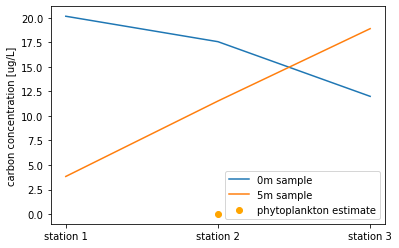

In [11]:
stations = ['station 1', 'station 2', 'station 3']
plt.plot(stations, C0, label = '0m sample')
plt.plot(stations, C5, label = '5m sample')
plt.scatter('station 2', Ctotal, c= 'orange', label ='phytoplankton estimate')
#plt.ylim(0,0.55)
plt.legend()
plt.ylabel('carbon concentration [ug/L]')